# Predicting Crime Rate in Chicago using Facebook Prophet

# Problem Statement

* The Chicago Crime dataset contains a summary of the reported crimes occurred in the City of Chicago from 2001 to 2017.
* Dataset has been obtained from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.
* Dataset contains the following columns:
> * ID: Unique identifier for the record.
Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
>
> * Date: Date when the incident occurred.
>
> * Block: address where the incident occurred
>
> * IUCR: The Illinois Unifrom Crime Reporting code.
>
> * Primary Type: The primary description of the IUCR code.
>
> * Description: The secondary description of the IUCR code, a subcategory of the primary description.
>
> * Location Description: Description of the location where the incident occurred.
>
> * Arrest: Indicates whether an arrest was made.
>
> * Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
>
> * Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car.
>
> * District: Indicates the police district where the incident occurred.
>
> * Ward: The ward (City Council district) where the incident occurred.
>
> * Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas.
>
> * FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).
>
> * X Coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.
>
> * Y Coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.
>
> * Year: Year the incident occurred.
>
> * Updated On: Date and time the record was last updated.
>
> * Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
>
> * Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
>
> * Location: The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.
* Datasource: https://www.kaggle.com/currie32/crimes-in-chicago

* Prophet is open source software released by Facebook’s Core Data Science team.

* Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.

* Prophet works best with time series that have strong seasonal effects and several seasons of historical data.

* For more information, please check this out: https://research.fb.com/prophet-forecasting-at-scale/ https://facebook.github.io/prophet/docs/quick_start.html#python-api

* You can install fbprophet package as follows: conda install -c conda-forge fbprophet

# STEP 1: Importing the Libraries/Datasets

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
chicago_df1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines = False)
chicago_df2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines = False)
chicago_df3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines = False)
# chicago_df4 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', error_bad_lines = False)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [0]:
chicago_df = pd.concat([chicago_df1, chicago_df2, chicago_df3], ignore_index = False, axis = 0)

# STEP 2: Data Exploration/Visualization

In [4]:
chicago_df.shape

(4393568, 23)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


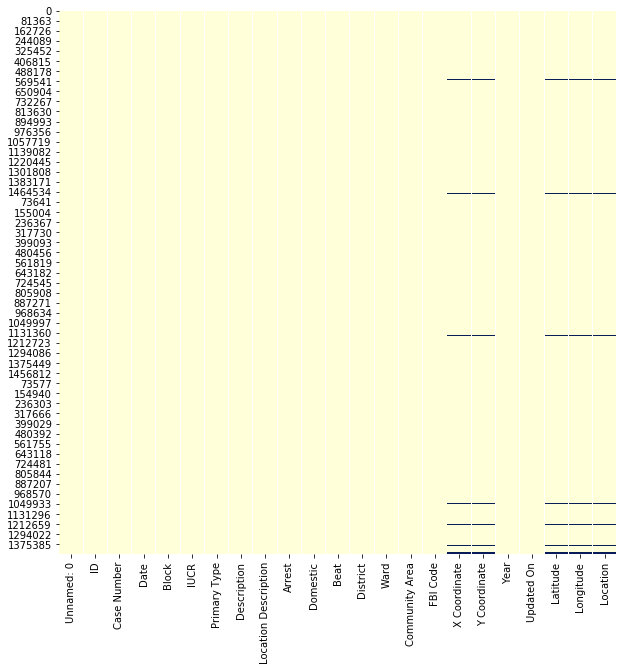

In [5]:
plt.figure(figsize = (10, 10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [0]:
# Dropping the columns not required for the model prediction
# ID Case Number Date Block IUCR Primary Type Description Location Description Arrest Domestic Beat District Ward Community Area FBI Code X Coordinate Y Coordinate Year Updated On Latitude Longitude Location
chicago_df.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [0]:
# Assembling the date column into the MM-DD-YYYY HH:MM:SS format compatible for FB prophet
chicago_df.Date = pd.to_datetime(chicago_df.Date, format = '%m/%d/%Y %I:%M:%S %p')

In [8]:
# Setting index to be date for FB prophet
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...,...
2016-05-03 23:33:00,10508679,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
2016-05-03 23:30:00,10508680,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
2016-05-03 00:15:00,10508681,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False


In [9]:
chicago_df['Primary Type'].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE',
       'ASSAULT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE',
       'ROBBERY', 'CRIMINAL TRESPASS', 'PROSTITUTION', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN'],
      dtype='object')

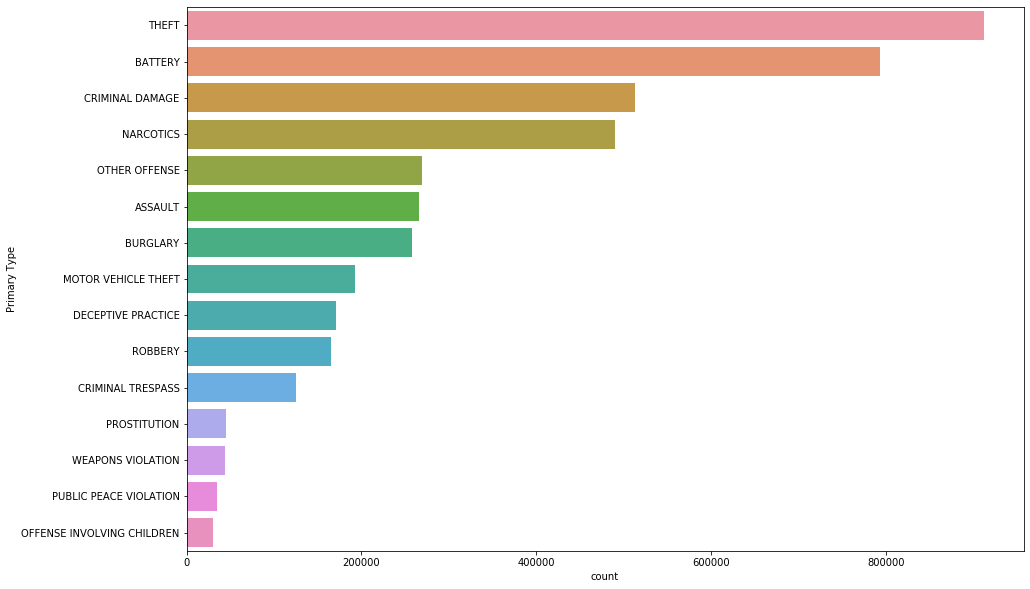

In [10]:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Primary Type', data = chicago_df, order = chicago_df['Primary Type'].value_counts().iloc[:15].index)

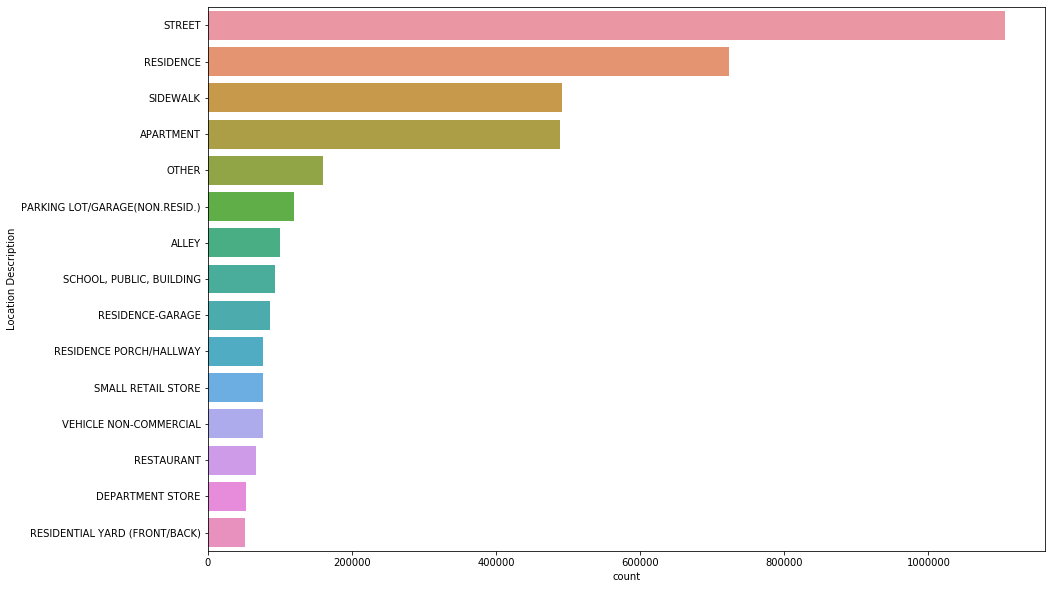

In [11]:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [20]:
chicago_df.resample('Y').size()

Date
2005-12-31    153125
2006-12-31    697572
2007-12-31    621559
2008-12-31    733942
2009-12-31    397566
2010-12-31    332044
2011-12-31      1046
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

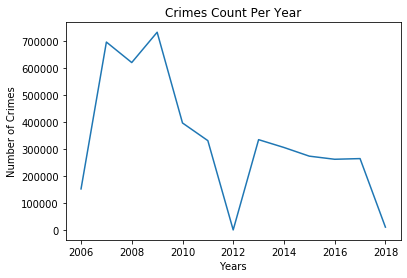

In [18]:
# Visualize the crime rate per Year by using resample

plt.plot(chicago_df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [19]:
chicago_df.resample('M').size()

Date
2005-01-31    33317
2005-02-28    31620
2005-03-31    35988
2005-04-30    33457
2005-05-31    14436
              ...  
2016-09-30    23235
2016-10-31    23314
2016-11-30    21140
2016-12-31    19580
2017-01-31    11357
Freq: M, Length: 145, dtype: int64

Text(0, 0.5, 'Number of Crimes')

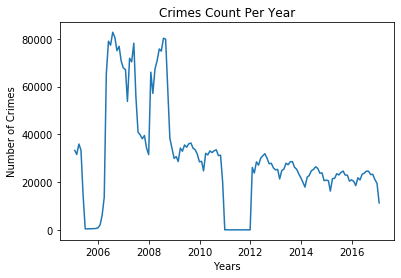

In [13]:
# Visualize the crime rate per Month by using resample

plt.plot(chicago_df.resample('M').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [0]:
chicago_df.resample('Q').size()

Text(0, 0.5, 'Number of Crimes')

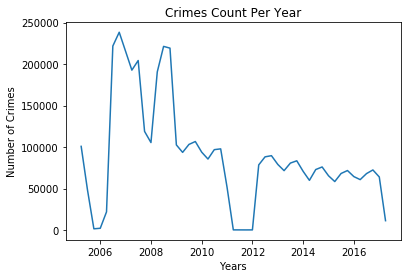

In [14]:
# Visualize the crime rate per Quarter by using resample

plt.plot(chicago_df.resample('Q').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

# STEP 3: Data Preparation

In [0]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [0]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [0]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)

In [0]:
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})

In [28]:
chicago_prophet_df_final

,ds,y
0,2005-01-31,33317
1,2005-02-28,31620
2,2005-03-31,35988
3,2005-04-30,33457
4,2005-05-31,14436
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


# STEP 4: Prediction

In [29]:
predictor = Prophet()
predictor.fit(chicago_prophet_df_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = predictor.make_future_dataframe(periods = 1095)
forecast = predictor.predict(future)

In [34]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,42799.279943,15530.758906,64856.273564,42799.279943,42799.279943,-3759.531214,-3759.531214,-3759.531214,-3759.531214,-3759.531214,-3759.531214,0.0,0.0,0.0,39039.748729
1,2005-02-28,42639.817043,11876.151340,60968.460477,42639.817043,42639.817043,-6441.921002,-6441.921002,-6441.921002,-6441.921002,-6441.921002,-6441.921002,0.0,0.0,0.0,36197.896040
2,2005-03-31,42463.268832,17359.337904,66551.191848,42463.268832,42463.268832,72.091677,72.091677,72.091677,72.091677,72.091677,72.091677,0.0,0.0,0.0,42535.360508
3,2005-04-30,42292.415724,23709.987006,71828.899391,42292.415724,42292.415724,4457.430715,4457.430715,4457.430715,4457.430715,4457.430715,4457.430715,0.0,0.0,0.0,46749.846439
4,2005-05-31,42115.867513,22908.268074,73458.767483,42115.867513,42115.867513,6791.603053,6791.603053,6791.603053,6791.603053,6791.603053,6791.603053,0.0,0.0,0.0,48907.470566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,2020-01-27,11613.759046,-17523.811303,33928.125375,11613.510358,11614.032165,-2660.102545,-2660.102545,-2660.102545,-2660.102545,-2660.102545,-2660.102545,0.0,0.0,0.0,8953.656500
1236,2020-01-28,11608.061484,-15237.187197,31920.698603,11607.812264,11608.335041,-2812.359750,-2812.359750,-2812.359750,-2812.359750,-2812.359750,-2812.359750,0.0,0.0,0.0,8795.701735
1237,2020-01-29,11602.363923,-16384.603526,32460.185634,11602.114171,11602.637898,-3009.649786,-3009.649786,-3009.649786,-3009.649786,-3009.649786,-3009.649786,0.0,0.0,0.0,8592.714136
1238,2020-01-30,11596.666361,-15127.557343,33970.418969,11596.416078,11596.940754,-3249.256818,-3249.256818,-3249.256818,-3249.256818,-3249.256818,-3249.256818,0.0,0.0,0.0,8347.409543


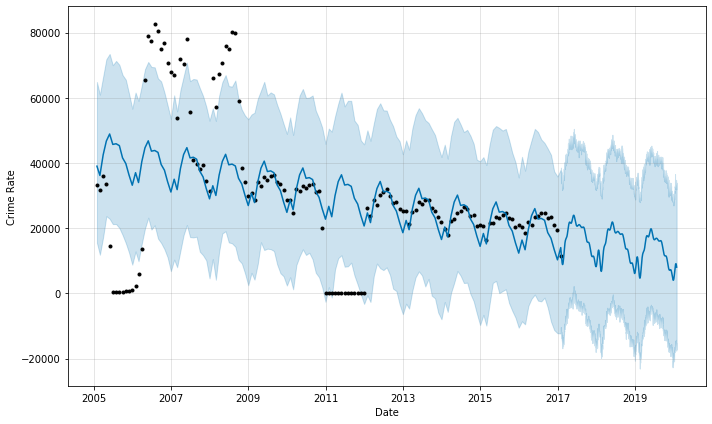

In [35]:
figure = predictor.plot(forecast, xlabel='Date', ylabel='Crime Rate')

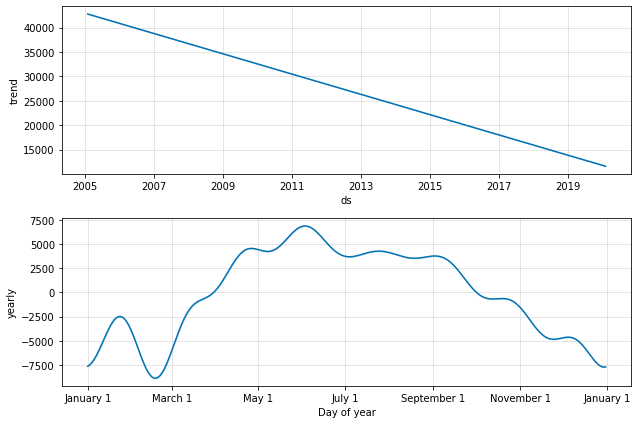

In [36]:
figure2 = predictor.plot_components(forecast)